In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio 
import cv2
import os

from helper_functions_professor import corrige_fundo

In [2]:
df = pd.read_csv('data/labels.csv')

# Encontrar as imagens representativas para cada categoria
gon_high_q = df[(df['Label'] == 'GON+') & (df['Quality Score'] > 6)].iloc[0]
gon_low_q = df[(df['Label'] == 'GON+') & (df['Quality Score'] < 6) & (df['Quality Score'] > 5)].iloc[0]
healthy_high_q = df[(df['Label'] == 'GON-') & (df['Quality Score'] > 6)].iloc[0]
healthy_low_q = df[(df['Label'] == 'GON-') & (df['Quality Score'] < 6) & (df['Quality Score'] > 5)].iloc[0]

In [ ]:
# Create a tidy DataFrame with the four representative rows and display it nicely
examples = pd.DataFrame([gon_high_q, gon_low_q, healthy_high_q, healthy_low_q])
examples = examples.reset_index(drop=True)
examples.index = ['GON+ (high Q)', 'GON+ (low Q)', 'GON- (high Q)', 'GON- (low Q)']
display(examples)

,Image Name,Patient,Label,Quality Score,Unnamed: 4
GON+ (high Q),0_0.jpg,0,GON+,6.18,NaN
GON+ (low Q),1_0.jpg,1,GON+,5.31,NaN
GON- (high Q),187_0.jpg,187,GON-,7.26,NaN
GON- (low Q),189_2.jpg,189,GON-,5.63,NaN


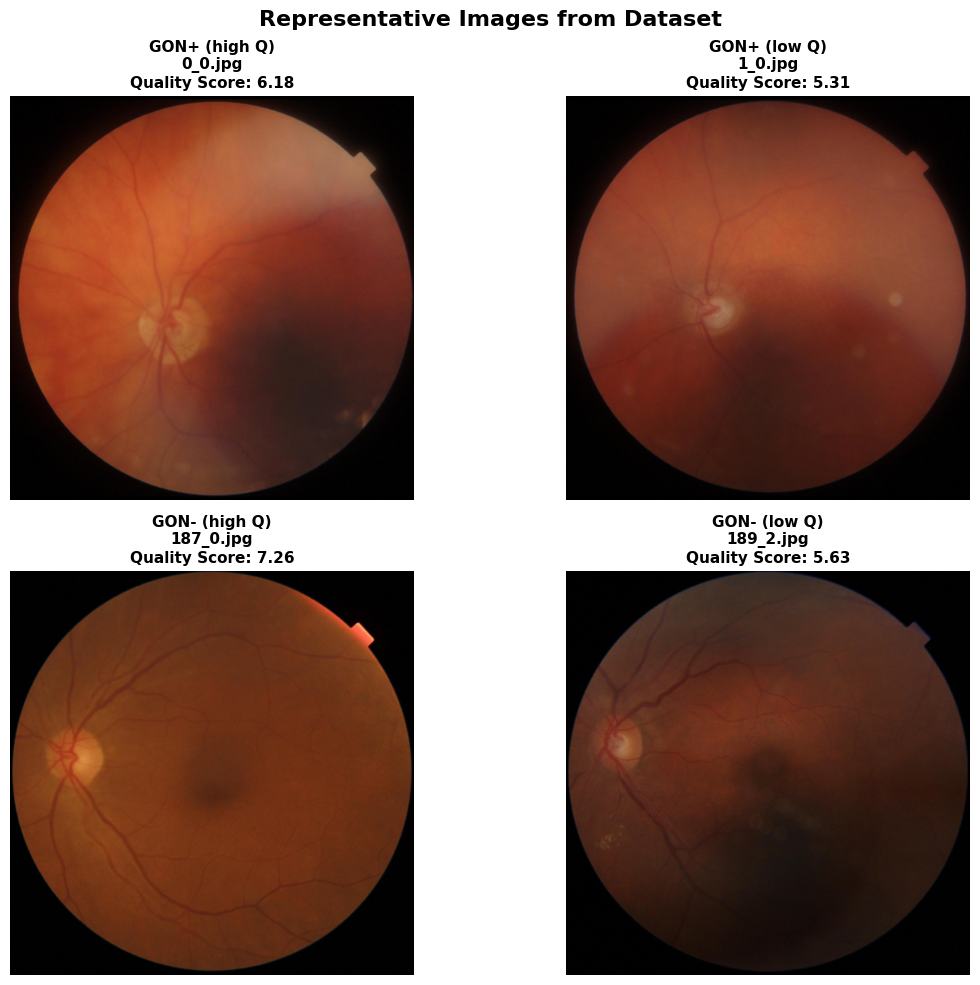

In [4]:
# Visualize the four selected images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Representative Images from Dataset', fontsize=16, fontweight='bold')

for idx, (label, row) in enumerate(examples.iterrows()):
    ax = axes[idx // 2, idx % 2]
    # Get image name and construct full path
    img_name = str(row.get('Image Name')).strip()
    img_path = os.path.join('data', 'images', img_name)
    
    # load and display the image
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.set_title(
            f"{label}\n{img_name}\nQuality Score: {row.get('Quality Score') or row.get('Quality Score,'):.2f}", 
            fontsize=11, 
            fontweight='bold'
        )
    else:
        ax.text(0.5, 0.5, f'Image not found:\n{img_name}', 
                ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f"{label} - MISSING", fontsize=11, color='orange')
    
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Process all four example images
enhanced_results = {}
for label, row in examples.iterrows():
    img_name = str(row.get('Image Name')).strip()
    img_path = os.path.join('data', 'images', img_name)
    retina = cv2.imread(img_path)
    r,g,b = cv2.split(retina) # separa os canais
    
    if os.path.exists(img_path):
        fundo_corrigido = corrige_fundo(g)

print(f"Successfully enhanced {len(enhanced_results)} images")

NameError: name 'corrige_fundo' is not defined

In [ ]:

green_ton = corrige_fundo(g)